In [1]:
from bigdl.util.common import *
from bigdl.transform.vision.image import *
import cv2
import numpy as np
from IPython.display import Image, display
init_engine()

# Create LocalImageFrame

In [2]:
from bigdl.util.common import *
from bigdl.transform.vision.image import *

# create LocalImageFrame from an image
local_image_frame = ImageFrame.read("/tmp/test.jpg")

# create LocalImageFrame from an image folder
local_image_frame = ImageFrame.read("/tmp/image/")

# create LocalImageFrame from list of images
image = cv2.imread("/tmp/test.jpg")
local_image_frame = LocalImageFrame([image])

print local_image_frame.get_image()
print 'isDistributed: ', local_image_frame.is_distributed(), ', isLocal: ', local_image_frame.is_local()

creating: createLocalImageFrame
[array([[[ 216.,  215.,  216., ...,  218.,  218.,  218.],
        [ 216.,  215.,  216., ...,  216.,  216.,  216.],
        [ 217.,  215.,  216., ...,  215.,  215.,  216.],
        ..., 
        [ 167.,  147.,  155., ...,  134.,  150.,  137.],
        [ 159.,  161.,  154., ...,  131.,  128.,  140.],
        [ 150.,  152.,  136., ...,  167.,  160.,  135.]],

       [[ 183.,  182.,  184., ...,  202.,  202.,  202.],
        [ 183.,  182.,  183., ...,  200.,  200.,  200.],
        [ 184.,  182.,  183., ...,  199.,  199.,  200.],
        ..., 
        [ 165.,  148.,  158., ...,  136.,  150.,  137.],
        [ 157.,  162.,  157., ...,  131.,  128.,  140.],
        [ 147.,  150.,  139., ...,  167.,  160.,  135.]],

       [[ 157.,  156.,  155., ...,  186.,  186.,  186.],
        [ 157.,  156.,  157., ...,  184.,  184.,  184.],
        [ 158.,  156.,  157., ...,  183.,  183.,  184.],
        ..., 
        [ 157.,  139.,  149., ...,  130.,  144.,  131.],
        [

# Create DistributedImageFrame

In [3]:
from bigdl.util.common import *
from bigdl.transform.vision.image import *

sparkConf = create_spark_conf().setMaster("local[2]").setAppName("test image")
sc = get_spark_context(sparkConf)
init_engine()

# create DistributedImageFrame from an image
distributed_image_frame = ImageFrame.read("/tmp/test.jpg", sc, 2)

# create DistributedImageFrame from an image folder
distributed_image_frame = ImageFrame.read("/tmp/image/", sc, 2)

# create LocalImageFrame from image rdd
image = cv2.imread("/tmp/test.jpg")
image_rdd = sc.parallelize([image], 2)
distributed_image_frame = DistributedImageFrame(image_rdd)

images_rdd = distributed_image_frame.get_image()
print images_rdd
print 'isDistributed: ', distributed_image_frame.is_distributed(), ', isLocal: ', distributed_image_frame.is_local()
print 'total images:', images_rdd.count()

creating: createDistributedImageFrame
PythonRDD[14] at RDD at PythonRDD.scala:48
isDistributed:  True , isLocal:  False
total images: 1


In [4]:
path = '/home/jxy/data/testdata/test/000019.jpg'
    
def transform_display(transformer, image_frame):
    out = transformer(image_frame)
    cv2.imwrite('/tmp/tmp.jpg', out.get_image(to_chw=False)[0])
    display(Image(filename='/tmp/tmp.jpg'))

creating: createBrightness


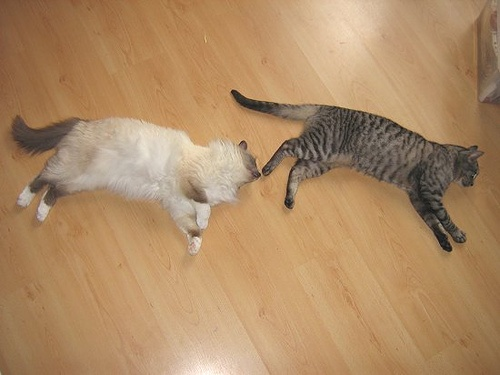

In [5]:
from bigdl.transform.vision.image import *
brightness = Brightness(0.0, 32.0)
image_frame = ImageFrame.read(path)
transform_display(brightness, image_frame)

creating: createHue


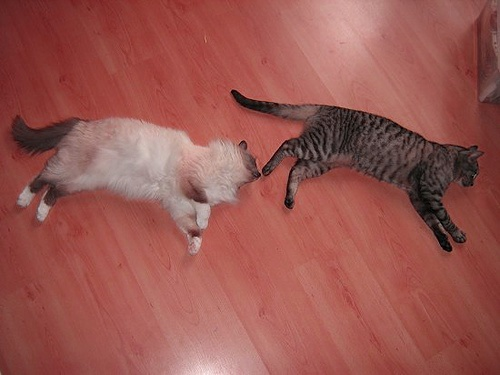

In [6]:
from bigdl.transform.vision.image import *
transformer = Hue(-18.0, 18.0)
image_frame = ImageFrame.read(path)
transform_display(transformer, image_frame)

creating: createSaturation


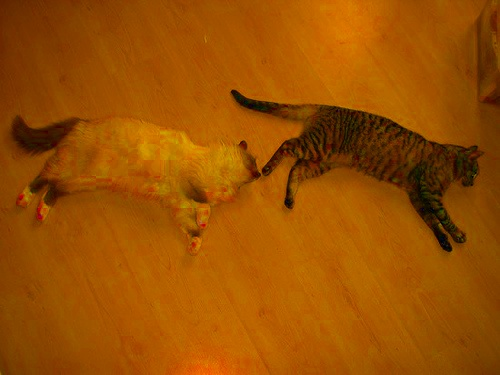

In [7]:
from bigdl.transform.vision.image import *
transformer = Saturation(10.0, 20.0)
image_frame = ImageFrame.read(path)
transform_display(transformer, image_frame)

creating: createChannelOrder


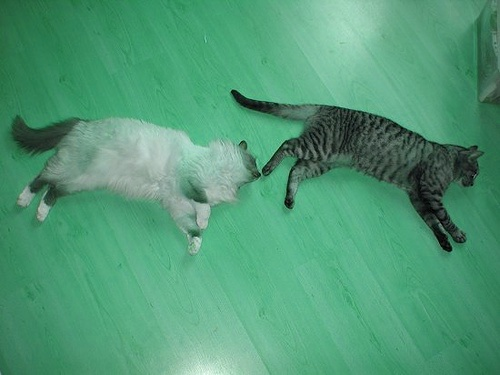

In [8]:
from bigdl.transform.vision.image import *
transformer = ChannelOrder()
image_frame = ImageFrame.read(path)
transform_display(transformer, image_frame)

creating: createColorJitter


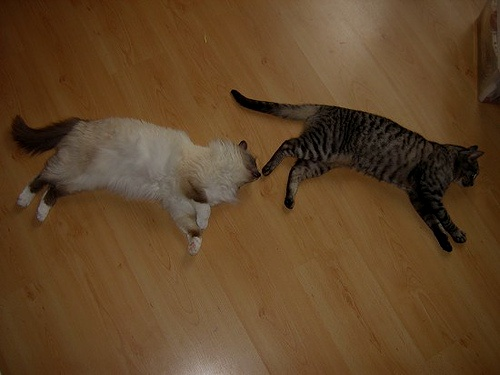

In [9]:
from bigdl.transform.vision.image import *
transformer = ColorJitter()
image_frame = ImageFrame.read(path)
transform_display(transformer, image_frame)

creating: createResize


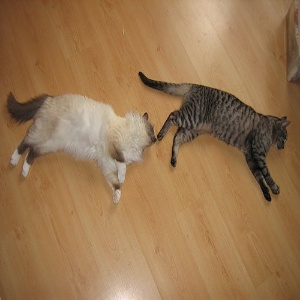

In [10]:
from bigdl.transform.vision.image import *
transformer = Resize(300, 300)
image_frame = ImageFrame.read(path)
transform_display(transformer, image_frame)

creating: createAspectScale


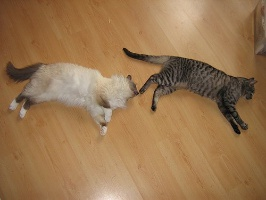

In [11]:
from bigdl.transform.vision.image import *
transformer = AspectScale(200, max_size = 3000)
image_frame = ImageFrame.read(path)
transform_display(transformer, image_frame)

creating: createRandomAspectScale


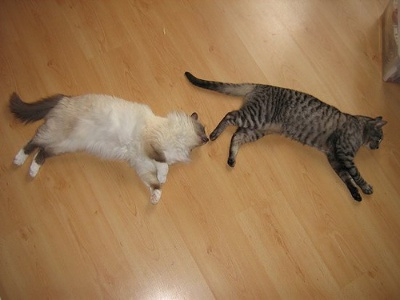

In [12]:
from bigdl.transform.vision.image import *
transformer = RandomAspectScale([100, 300], max_size = 3000)
image_frame = ImageFrame.read(path)
transform_display(transformer, image_frame)

creating: createChannelNormalize


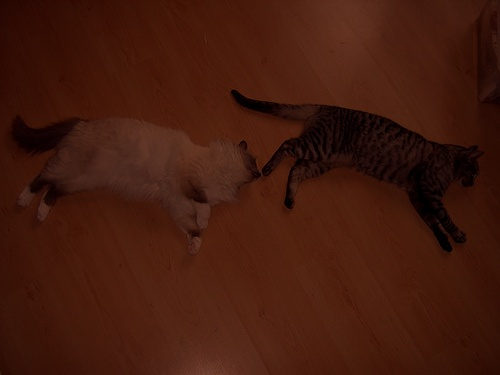

In [13]:
from bigdl.transform.vision.image import *
transformer = ChannelNormalize(20.0, 30.0, 40.0, 2.0, 3.0, 4.0)
image_frame = ImageFrame.read(path)
transform_display(transformer, image_frame)

creating: createPixelNormalize


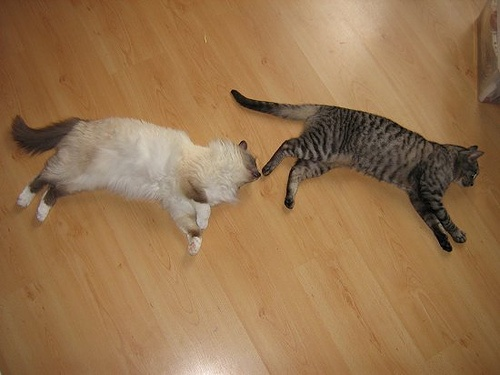

In [14]:
from bigdl.transform.vision.image import *
means = [2.0] * 3 * 500 * 375
transformer = PixelNormalize(means)
image_frame = ImageFrame.read(path)
transform_display(transformer, image_frame)

creating: createCenterCrop


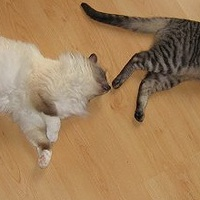

In [15]:
from bigdl.transform.vision.image import *
transformer = CenterCrop(200, 200)
image_frame = ImageFrame.read(path)
transform_display(transformer, image_frame)

creating: createRandomCrop


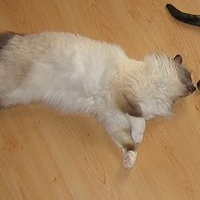

In [16]:
from bigdl.transform.vision.image import *
transformer = RandomCrop(200, 200)
image_frame = ImageFrame.read(path)
transform_display(transformer, image_frame)

creating: createFixedCrop


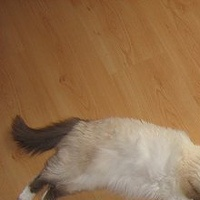

In [17]:
from bigdl.transform.vision.image import *

transformer = FixedCrop(0.0, 0.0, 200.0, 200.0, False)
image_frame = ImageFrame.read(path)
transform_display(transformer, image_frame)

creating: createFiller


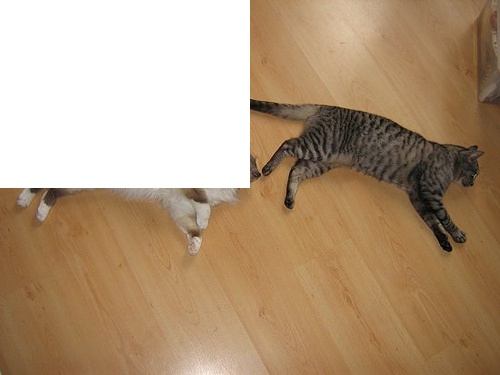

In [18]:
from bigdl.transform.vision.image import *
transformer = Filler(0.0, 0.0, 0.5, 0.5, 255)
image_frame = ImageFrame.read(path)
transform_display(transformer, image_frame)

creating: createExpand


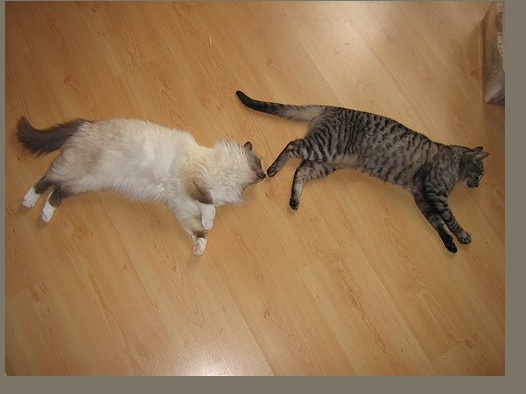

In [19]:
from bigdl.transform.vision.image import *

transformer = Expand(means_r=123, means_g=117, means_b=104,
                        max_expand_ratio=2.0)
image_frame = ImageFrame.read(path)
transform_display(transformer, image_frame)

creating: createHFlip


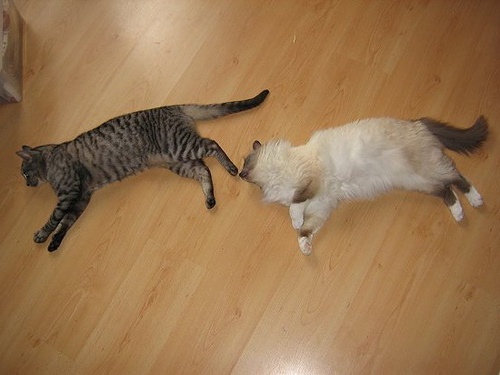

In [20]:
from bigdl.transform.vision.image import *
transformer = HFlip()
image_frame = ImageFrame.read(path)
transform_display(transformer, image_frame)

creating: createHFlip
creating: createRandomTransformer


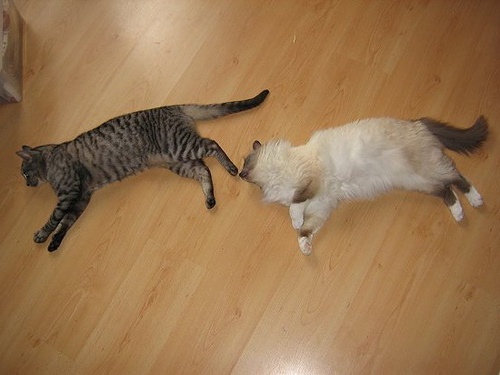

In [21]:
from bigdl.transform.vision.image import *
transformer = RandomTransformer(HFlip(), 0.5)
image_frame = ImageFrame.read(path)
transform_display(transformer, image_frame)

creating: createBytesToMat
creating: createColorJitter
creating: createExpand
creating: createResize
creating: createHFlip
creating: createPipeline


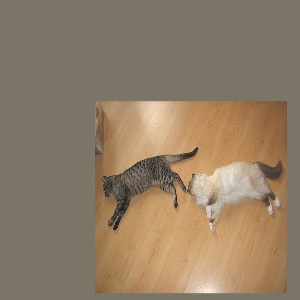

In [22]:
transformer = Pipeline([BytesToMat(),
      ColorJitter(),
      Expand(max_expand_ratio=2.0),
      Resize(300, 300, -1),
      HFlip()])
image_frame = ImageFrame.read(path)
transform_display(transformer, image_frame)